In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Đọc dữ liệu
data = pd.read_csv('../datas/train_div10.csv')
data_test = pd.read_csv('../datas/test_div10.csv')

In [2]:
import sys
sys.path.append('../extraction')  

from extraction import (
    create_training_data,
    calculate_accelerometer_features,
    calculate_accelerometer_fft_features,
    create_training_data_NN_like_micro
)

x_list, y_list, z_list, train_labels = create_training_data(
    data=data, window_size=20, step_size=10)
total_list_NN, train_labels_NN = create_training_data_NN_like_micro(data=data)


x_list_test, y_list_test, z_list_test, train_labels_test = create_training_data(
    data=data_test, window_size=20, step_size=10)
total_list_NN_test, train_labels_NN_test = create_training_data_NN_like_micro(
    data=data_test)


Created 31556 windows × 10 samples (interleaved format)
Created 12749 windows × 10 samples (interleaved format)


In [3]:
features = calculate_accelerometer_features(
    x_list=x_list, y_list=y_list, z_list=z_list, window_size=20)
# test
features_test = calculate_accelerometer_features(
    x_list=x_list_test, y_list=y_list_test, z_list=z_list_test, window_size=20)

c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:102: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['x_skewness'] = [stats.skew(x) for x in x_list]
c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:103: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['y_skewness'] = [stats.skew(y) for y in y_list]
c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:104: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['z_skewness'] = [stats.skew(z) for z in z_list]
c:\Users\Admin\Desktop

In [4]:
features_fft = calculate_accelerometer_fft_features(
    x_list=x_list, y_list=y_list, z_list=z_list, window_size=10)
# test
features_fft_test = calculate_accelerometer_fft_features(
    x_list=x_list_test, y_list=y_list_test, z_list=z_list_test, window_size=10)

c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:190: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'x_kurtosis_fft': [stats.kurtosis(a) for a in x_fft_list],
c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:191: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'y_kurtosis_fft': [stats.kurtosis(a) for a in y_fft_list],
c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:192: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'z_kurtosis_fft': [stats.kurtosis(a) for a in z_fft_list],
c:\Users\Admi

In [5]:
print(features_fft.columns.tolist())


['x_mean_fft', 'y_mean_fft', 'z_mean_fft', 'x_min_fft', 'y_min_fft', 'z_min_fft', 'x_maxmin_diff_fft', 'y_maxmin_diff_fft', 'z_maxmin_diff_fft', 'x_median_fft', 'y_median_fft', 'z_median_fft', 'x_IQR_fft', 'y_IQR_fft', 'z_IQR_fft', 'x_above_mean_fft', 'y_above_mean_fft', 'z_above_mean_fft', 'x_peak_count_fft', 'y_peak_count_fft', 'z_peak_count_fft', 'x_kurtosis_fft', 'y_kurtosis_fft', 'z_kurtosis_fft', 'x_energy_fft', 'y_energy_fft', 'z_energy_fft', 'avg_result_accl_fft', 'sma_fft', 'n_fft_bins']


In [6]:
features = features[['x_mean', 'y_mean', 'z_mean', 'x_std', 'y_std', 'z_std', 'x_aad',
                     'y_aad', 'z_aad', 'x_median', 'y_median', 'z_median', 'x_mad', 'y_mad', 'z_mad', 'x_IQR', 'y_IQR',
                     'z_IQR', 'x_neg_count', 'y_neg_count', 'z_neg_count', 'x_pos_count',
                     'y_pos_count', 'z_pos_count', 'x_above_mean', 'y_above_mean', 'z_above_mean', 'x_peak_count', 'y_peak_count', 'z_peak_count',
                     'x_skewness', 'y_skewness', 'z_skewness', 'x_kurtosis', 'y_kurtosis',
                     'z_kurtosis', 'x_energy', 'y_energy', 'z_energy', 'avg_result_accl',
                     'sma']]

features_fft = features_fft[['x_mean_fft', 'y_mean_fft', 'z_mean_fft', 'x_min_fft',
                             'y_min_fft', 'z_min_fft', 'x_maxmin_diff_fft', 'y_maxmin_diff_fft', 'z_maxmin_diff_fft',
                             'x_median_fft', 'y_median_fft', 'z_median_fft', 'x_IQR_fft', 'y_IQR_fft', 'z_IQR_fft', 'x_above_mean_fft', 'y_above_mean_fft', 'z_above_mean_fft',
                             'x_peak_count_fft', 'y_peak_count_fft', 'z_peak_count_fft',
                             'x_kurtosis_fft', 'y_kurtosis_fft', 'z_kurtosis_fft', 'x_energy_fft', 'y_energy_fft',
                             'z_energy_fft', 'avg_result_accl_fft', 'sma_fft']]

features_test = features_test[['x_mean', 'y_mean', 'z_mean', 'x_std', 'y_std', 'z_std', 'x_aad',
                     'y_aad', 'z_aad', 'x_median', 'y_median', 'z_median', 'x_mad', 'y_mad', 'z_mad', 'x_IQR', 'y_IQR',
                     'z_IQR', 'x_neg_count', 'y_neg_count', 'z_neg_count', 'x_pos_count',
                     'y_pos_count', 'z_pos_count', 'x_above_mean', 'y_above_mean', 'z_above_mean', 'x_peak_count', 'y_peak_count', 'z_peak_count',
                     'x_skewness', 'y_skewness', 'z_skewness', 'x_kurtosis', 'y_kurtosis',
                     'z_kurtosis', 'x_energy', 'y_energy', 'z_energy', 'avg_result_accl',
                     'sma']]

features_fft_test = features_fft_test[['x_mean_fft', 'y_mean_fft', 'z_mean_fft', 'x_min_fft',
                             'y_min_fft', 'z_min_fft', 'x_maxmin_diff_fft', 'y_maxmin_diff_fft', 'z_maxmin_diff_fft',
                             'x_median_fft', 'y_median_fft', 'z_median_fft', 'x_IQR_fft', 'y_IQR_fft', 'z_IQR_fft', 'x_above_mean_fft', 'y_above_mean_fft', 'z_above_mean_fft',
                             'x_peak_count_fft', 'y_peak_count_fft', 'z_peak_count_fft',
                             'x_kurtosis_fft', 'y_kurtosis_fft', 'z_kurtosis_fft', 'x_energy_fft', 'y_energy_fft',
                             'z_energy_fft', 'avg_result_accl_fft', 'sma_fft']]

In [7]:
features_all = pd.concat([features, features_fft], axis=1)
features_all_test = pd.concat([features_test, features_fft_test], axis=1)

In [8]:
# Kiểm tra có bao nhiêu giá trị NaN
print("🔍 Số NaN trong mỗi cột:")
print(features_all.isna().sum().sort_values(ascending=False).head(10))

🔍 Số NaN trong mỗi cột:
x_skewness        1112
x_kurtosis        1112
x_kurtosis_fft     971
y_kurtosis_fft     784
y_skewness         679
y_kurtosis         679
z_kurtosis_fft     430
z_kurtosis         206
z_skewness         206
sma                  0
dtype: int64


In [9]:
features_all = features_all.fillna(features_all.mean())
features_all_test = features_all_test.fillna(features_all_test.mean())

In [10]:
from optimation import optimize_RF

In [11]:
# best_rf = optimize_RF(features_all, train_labels)

# # Dự đoán trên tập test
# y_pred = best_rf.predict(features_all_test)

# # Đánh giá độ chính xác
# accuracy = (y_pred == train_labels_test).mean()
# print("✅ Test Accuracy:", accuracy)


In [12]:
# from optimation import optimize_LR


# best_lr, scaler = optimize_LR(features_all, features_all_test, train_labels, train_labels_test)

# # 🧠 Dự đoán trên tập test (đã được scale bên trong hàm)
# y_pred = best_lr.predict(scaler.transform(features_all_test))

# # 🎯 Đánh giá độ chính xác
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(train_labels_test, y_pred)
# print(f"✅ Test Accuracy: {accuracy:.4f}")

🔧 Starting Support Vector Machine optimization...
⏱ Training time (scaler fit): 0.0100s
Fitting 3 folds for each of 72 candidates, totalling 216 fits
✅ Best Params: {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}
✅ Best CV Score: 0.9661874894670897

🎯 Test Accuracy: 0.9406

------------- Classification Report (Optimized SVM) -------------

              precision    recall  f1-score   support

           1       1.00      0.87      0.93      2863
           2       0.86      1.00      0.92       805
           3       0.91      1.00      0.95      2417
           4       1.00      0.99      0.99       240

    accuracy                           0.94      6325
   macro avg       0.94      0.96      0.95      6325
weighted avg       0.95      0.94      0.94      6325



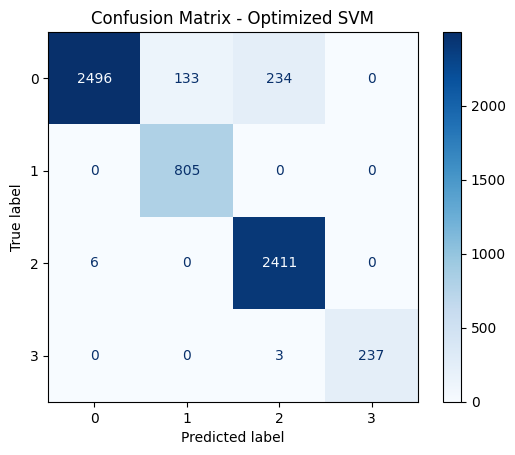

✅ Test Accuracy: 0.9406


In [ ]:
# from optimation import optimize_SVM
# from sklearn.metrics import accuracy_score

# # ⚙️ Huấn luyện SVM với dữ liệu train/test
# best_svm, scaler = optimize_SVM(features_all, features_all_test, train_labels, train_labels_test)

# # 🧠 Dự đoán trên tập test (đã được scale bên trong hàm)
# y_pred = best_svm.predict(scaler.transform(features_all_test))

# # 🎯 Đánh giá độ chính xác
# accuracy = accuracy_score(train_labels_test, y_pred)
# print(f"✅ Test Accuracy: {accuracy:.4f}")

In [14]:
# from optimation import optimize_GB
# from sklearn.metrics import accuracy_score

# # ⚙️ Huấn luyện SVM với dữ liệu train/test
# best_gb, scaler = optimize_GB(features_all, features_all_test, train_labels, train_labels_test)

# # 🧠 Dự đoán trên tập test (đã được scale bên trong hàm)
# y_pred = best_gb.predict(scaler.transform(features_all_test))

# # 🎯 Đánh giá độ chính xác
# accuracy = accuracy_score(train_labels_test, y_pred)
# print(f"✅ Test Accuracy: {accuracy:.4f}")

In [15]:
# from optimation import optimize_NN_raw

# # Huấn luyện và dò tham số tốt nhất
# best_nn = optimize_NN_raw(total_list_NN, total_list_NN_test,
#                           train_labels_NN, train_labels_NN_test)

🌲 Training Random Forest (optimized)...
🎯 Test Accuracy: 0.9945
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2863
           2       0.99      1.00      0.99       805
           3       0.99      1.00      0.99      2417
           4       1.00      0.93      0.96       240

    accuracy                           0.99      6325
   macro avg       0.99      0.98      0.99      6325
weighted avg       0.99      0.99      0.99      6325



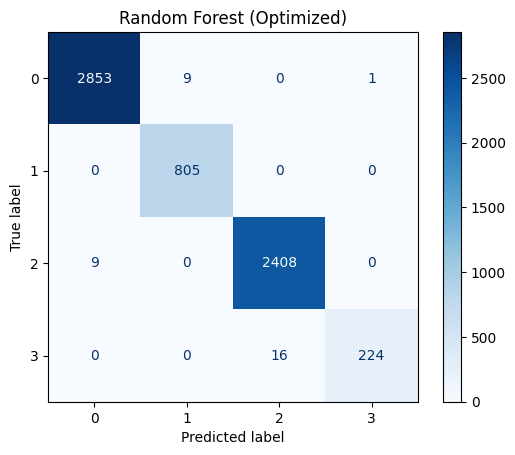

In [ ]:
from models import train_RF
modelRF = train_RF(features_all, features_all_test, train_labels, train_labels_test)


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 15675it [08:27, 30.56it/s]                           


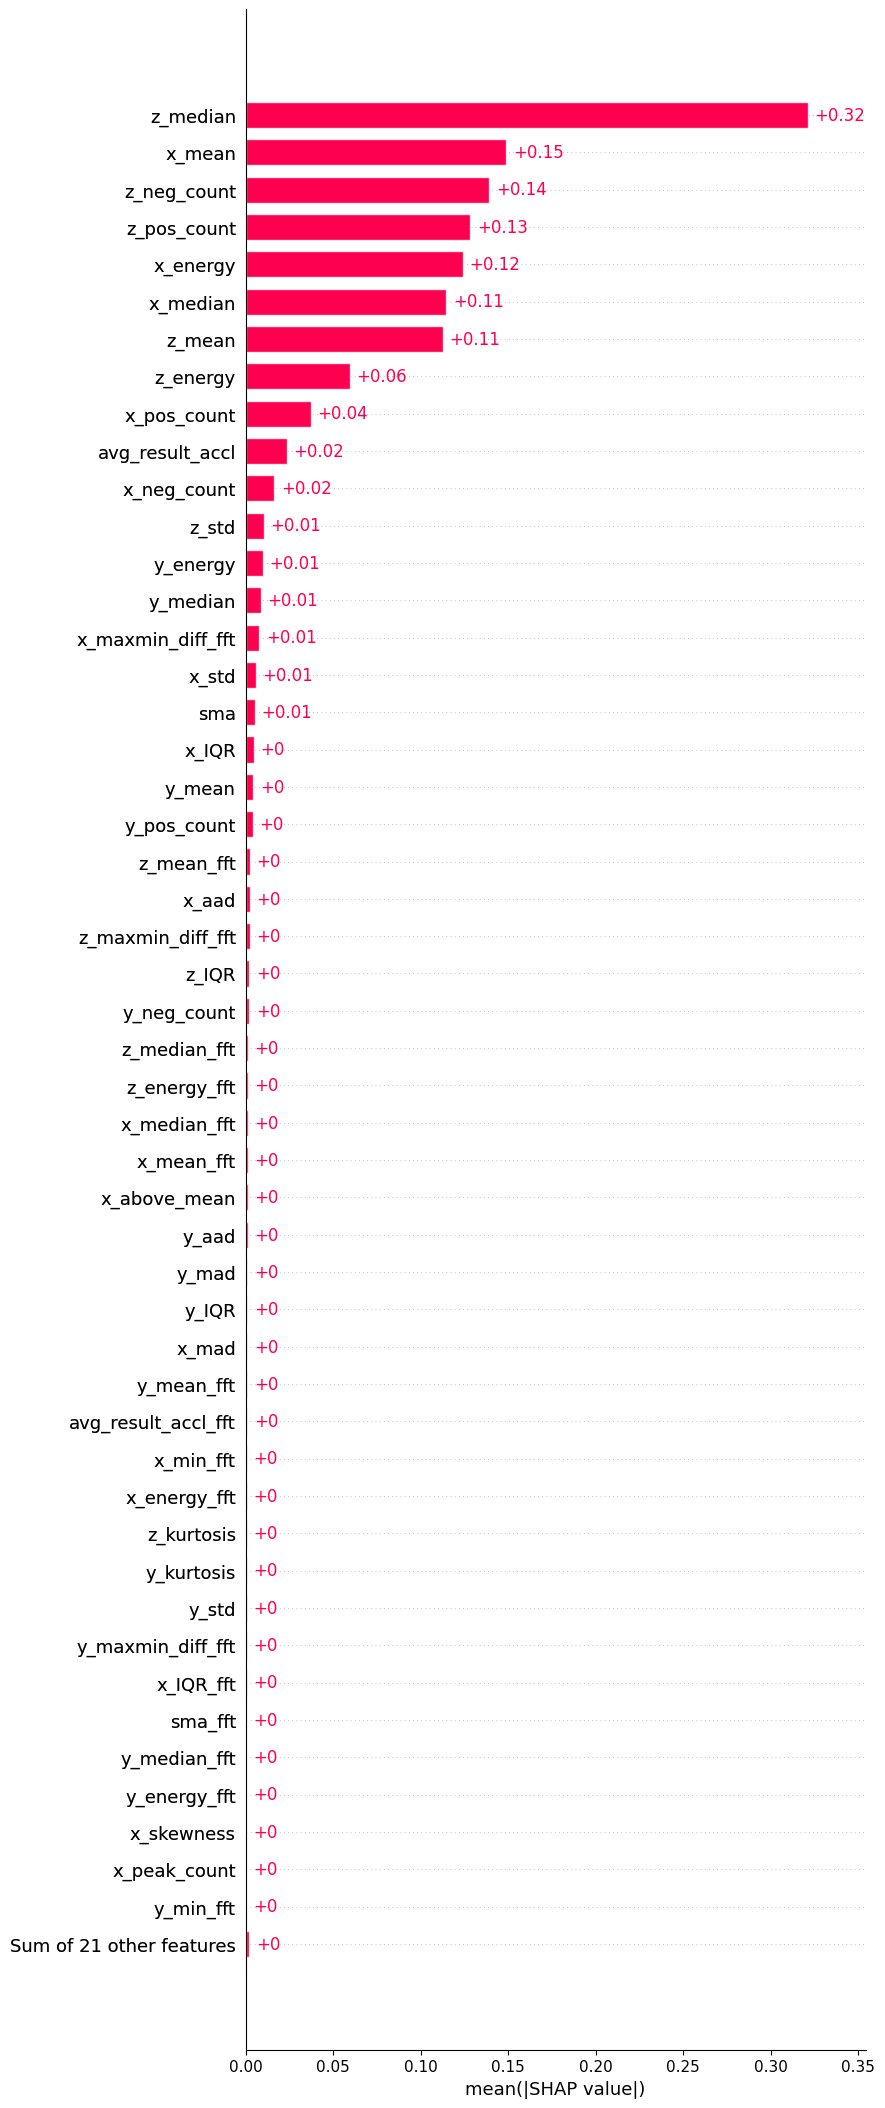

In [24]:
import shap

explainer = shap.Explainer(modelRF.predict, features_all)
shap_values = explainer(features_all)
shap.plots.bar(shap_values, max_display=50)

📈 Training Logistic Regression (optimized)...


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


🎯 Test Accuracy: 0.9666
              precision    recall  f1-score   support

           1       1.00      0.93      0.96      2863
           2       0.86      1.00      0.93       805
           3       0.97      1.00      0.98      2417
           4       1.00      0.99      0.99       240

    accuracy                           0.97      6325
   macro avg       0.96      0.98      0.97      6325
weighted avg       0.97      0.97      0.97      6325



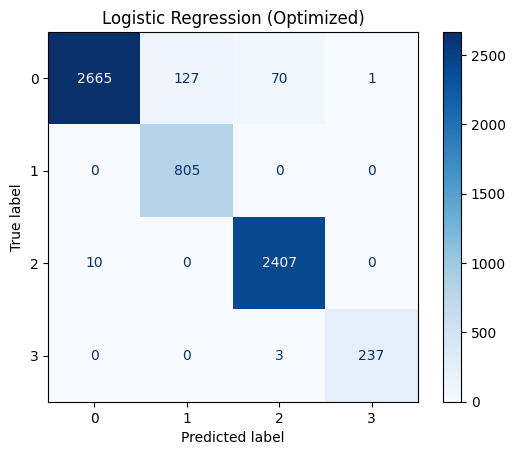

In [ ]:
from models import train_LR
modelLR, scalerLr = train_LR(features_all, features_all_test, train_labels, train_labels_test)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14040\3147796663.py:17: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_scaled, plot_type="bar", max_display=50)


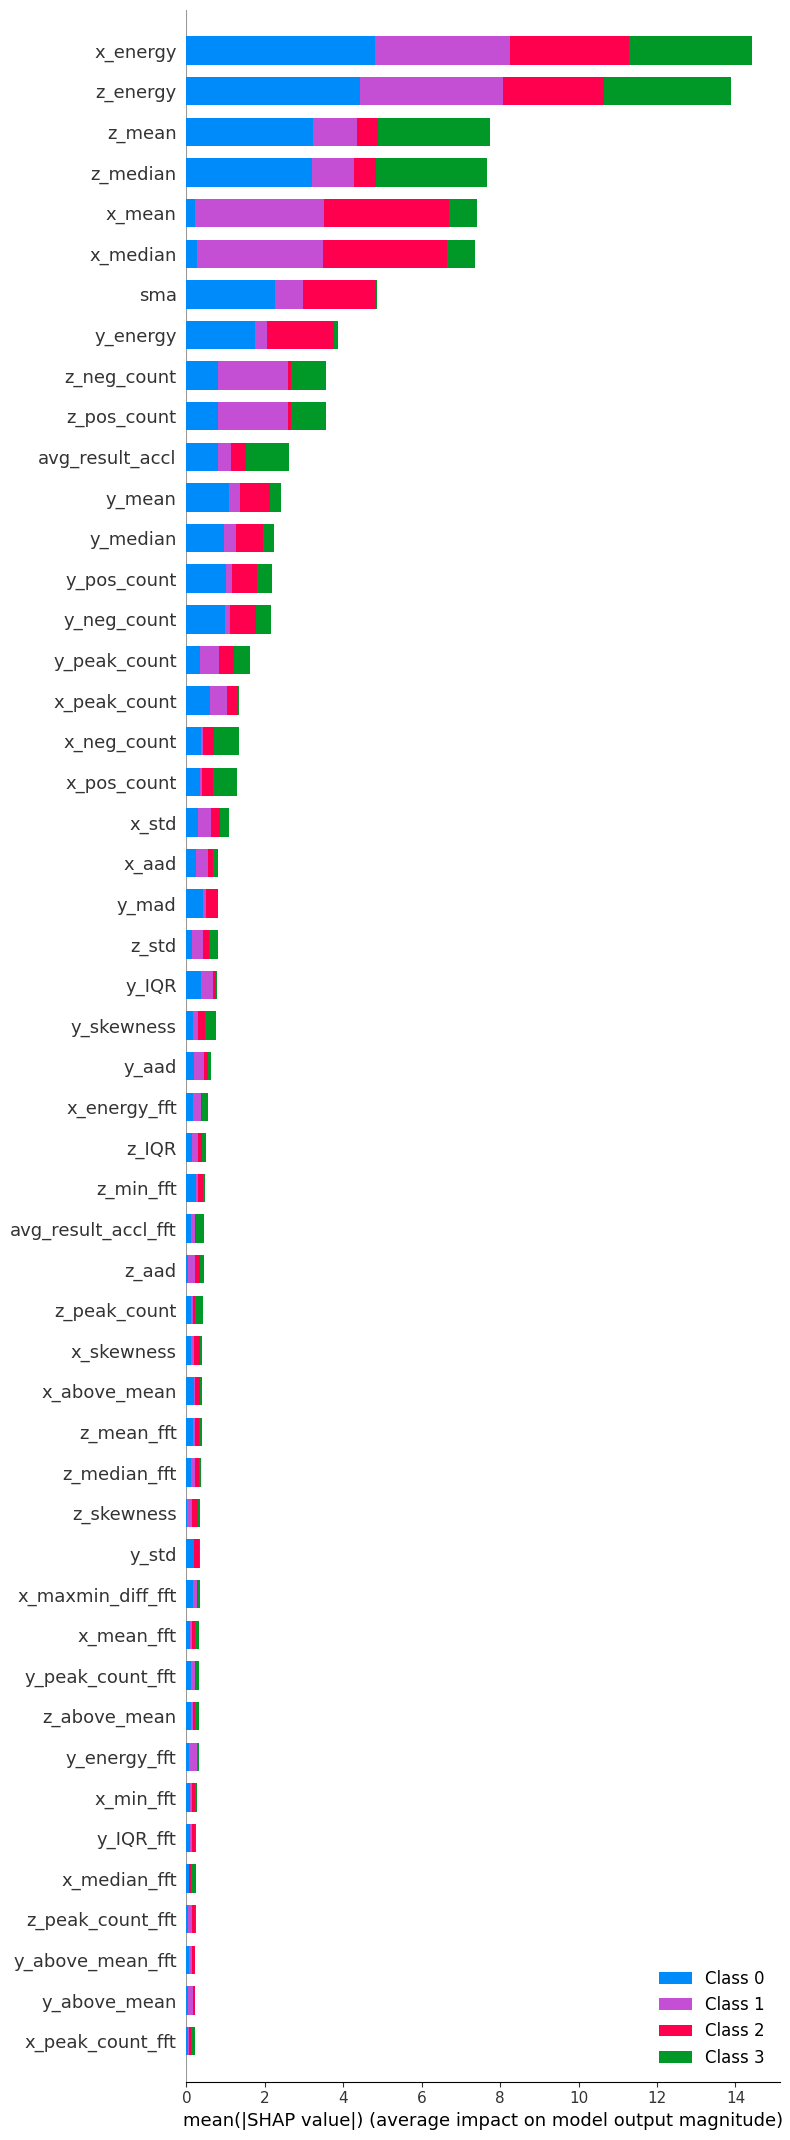

In [ ]:
import shap
import pandas as pd

# ⚙️ Bước 1: Đảm bảo features_all là DataFrame có tên cột
# (bạn đã làm đúng ở trên với features và features_fft)
# ⚠️ Tuy nhiên sau khi chuẩn hóa, cần gắn lại tên cột:
X_scaled = scalerLr.transform(features_all)
X_scaled = pd.DataFrame(X_scaled, columns=features_all.columns)

# ⚙️ Bước 2: Tạo LinearExplainer
explainer = shap.LinearExplainer(modelLR, X_scaled, feature_names=features_all.columns)

# ⚙️ Bước 3: Tính SHAP values
shap_values = explainer.shap_values(X_scaled)

# ⚙️ Bước 4: Vẽ biểu đồ SHAP
shap.summary_plot(shap_values, X_scaled, plot_type="bar", max_display=50)

💡 Training SVM (optimized)...
🎯 Test Accuracy: 0.9406
              precision    recall  f1-score   support

           1       1.00      0.87      0.93      2863
           2       0.86      1.00      0.92       805
           3       0.91      1.00      0.95      2417
           4       1.00      0.99      0.99       240

    accuracy                           0.94      6325
   macro avg       0.94      0.96      0.95      6325
weighted avg       0.95      0.94      0.94      6325



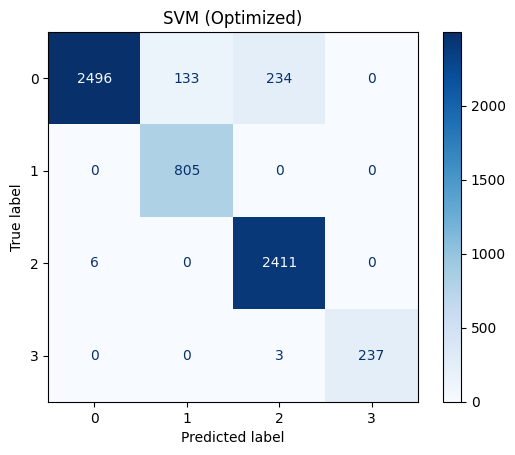

In [34]:
from models import train_SVM
modelSVM, scalerSVM = train_SVM(features_all, features_all_test, train_labels, train_labels_test)

In [35]:
import shap
import numpy as np
import pandas as pd
X_train_scaled = scalerSVM.transform(features_all)
X_test_scaled = scalerSVM.transform(features_all_test)
explainer = shap.KernelExplainer(modelSVM.predict, X_train_scaled[:200])  # dùng 200 mẫu đầu làm background (để tiết kiệm thời gian)

# ⚙️ Tính giá trị SHAP
shap_values = explainer.shap_values(X_test_scaled[:300])  # có thể giới hạn 300 mẫu test để tránh tính lâu


Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 300/300 [06:06<00:00,  1.22s/it]


C:\Users\Admin\AppData\Local\Temp\ipykernel_14040\1027837958.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_scaled_df, plot_type="bar", max_display=30)


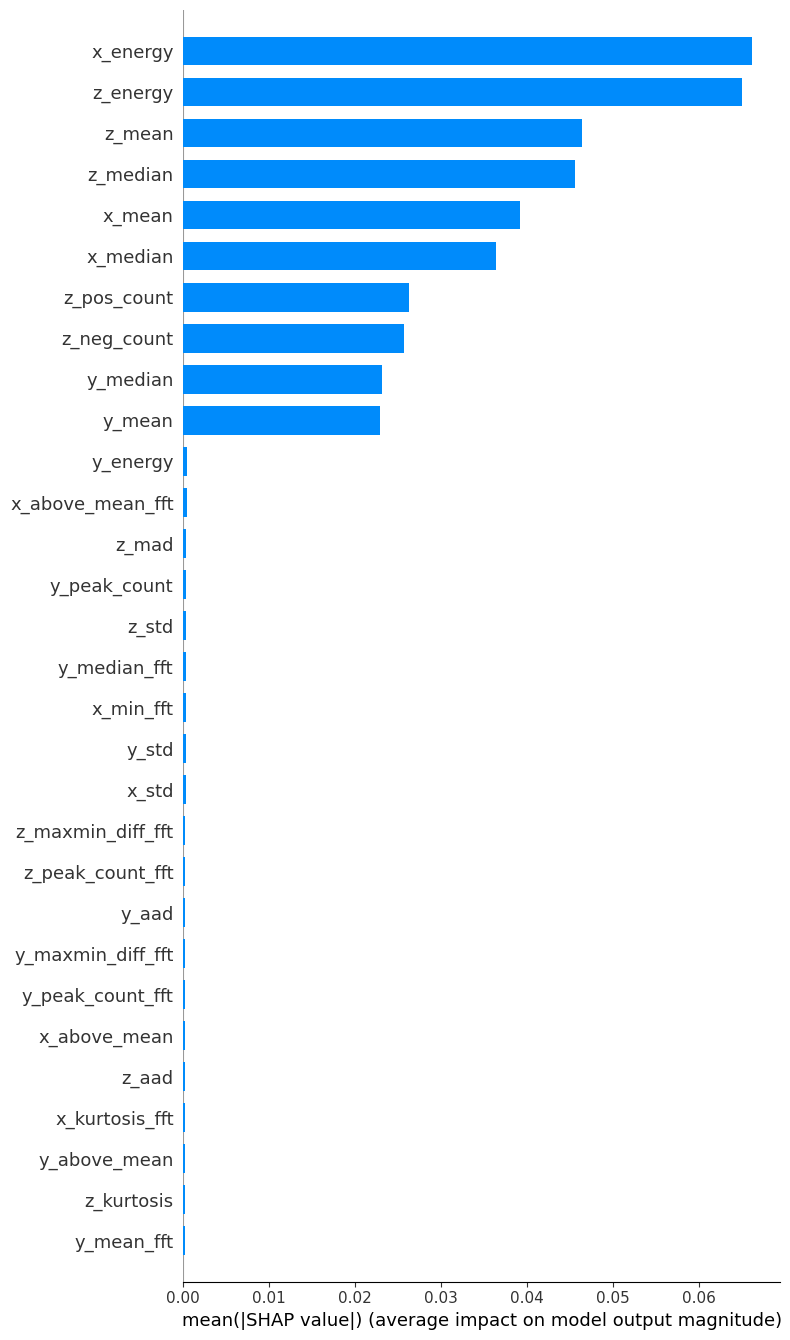

In [36]:
# Chuyển test set thành DataFrame có tên cột
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features_all.columns)

# Vẽ bar chart (top 30 feature quan trọng nhất)
shap.summary_plot(shap_values, X_test_scaled_df, plot_type="bar", max_display=30)


🔥 Training Gradient Boosting (optimized)...
🎯 Test Accuracy: 0.9951
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2863
           2       1.00      1.00      1.00       805
           3       0.99      1.00      0.99      2417
           4       1.00      0.92      0.95       240

    accuracy                           1.00      6325
   macro avg       1.00      0.98      0.99      6325
weighted avg       1.00      1.00      1.00      6325



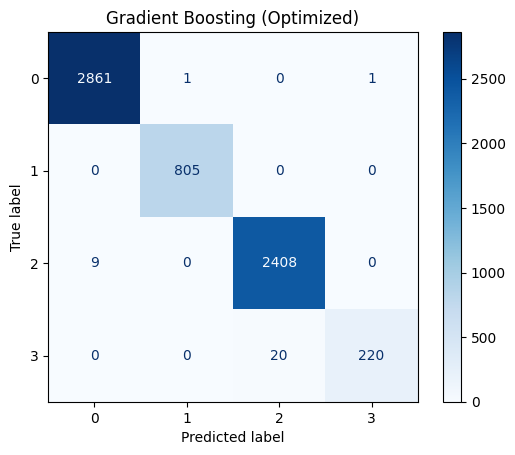

In [37]:
from models import train_GB
modelGB, scalerGB = train_GB(features_all, features_all_test, train_labels, train_labels_test)


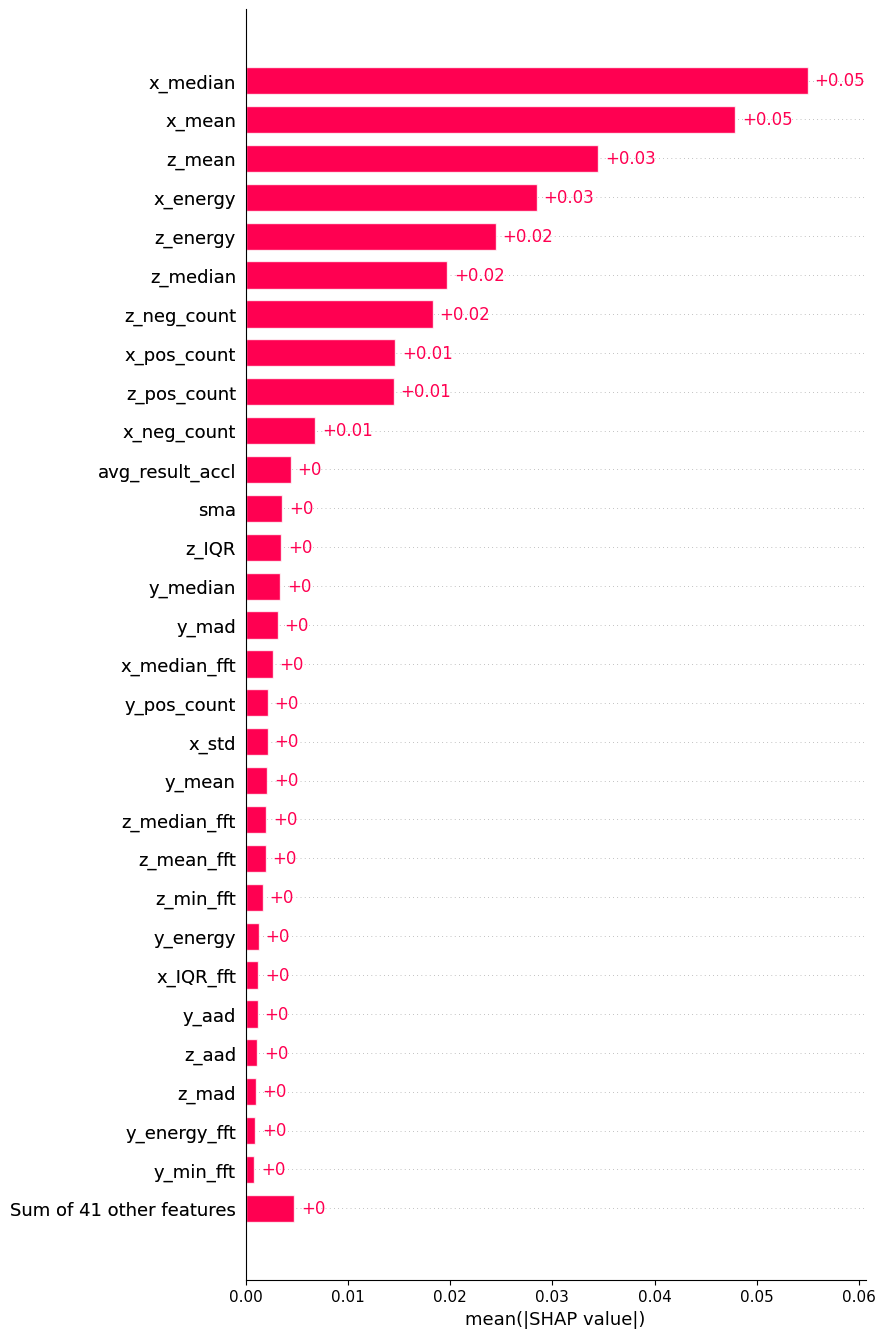

In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Chuẩn hóa dữ liệu như khi train
X_train_scaled_gb = scalerGB.transform(features_all)
X_test_scaled_gb = scalerGB.transform(features_all_test)

X_train_scaled_gb = pd.DataFrame(X_train_scaled_gb, columns=features_all.columns)
X_test_scaled_gb = pd.DataFrame(X_test_scaled_gb, columns=features_all.columns)

# ⚙️ Tạo Explainer dùng hàm dự đoán (predict_proba) thay vì truyền model
explainer = shap.Explainer(modelGB.predict_proba, X_train_scaled_gb)

# ⚙️ Tính giá trị SHAP
shap_values = explainer(X_test_scaled_gb)




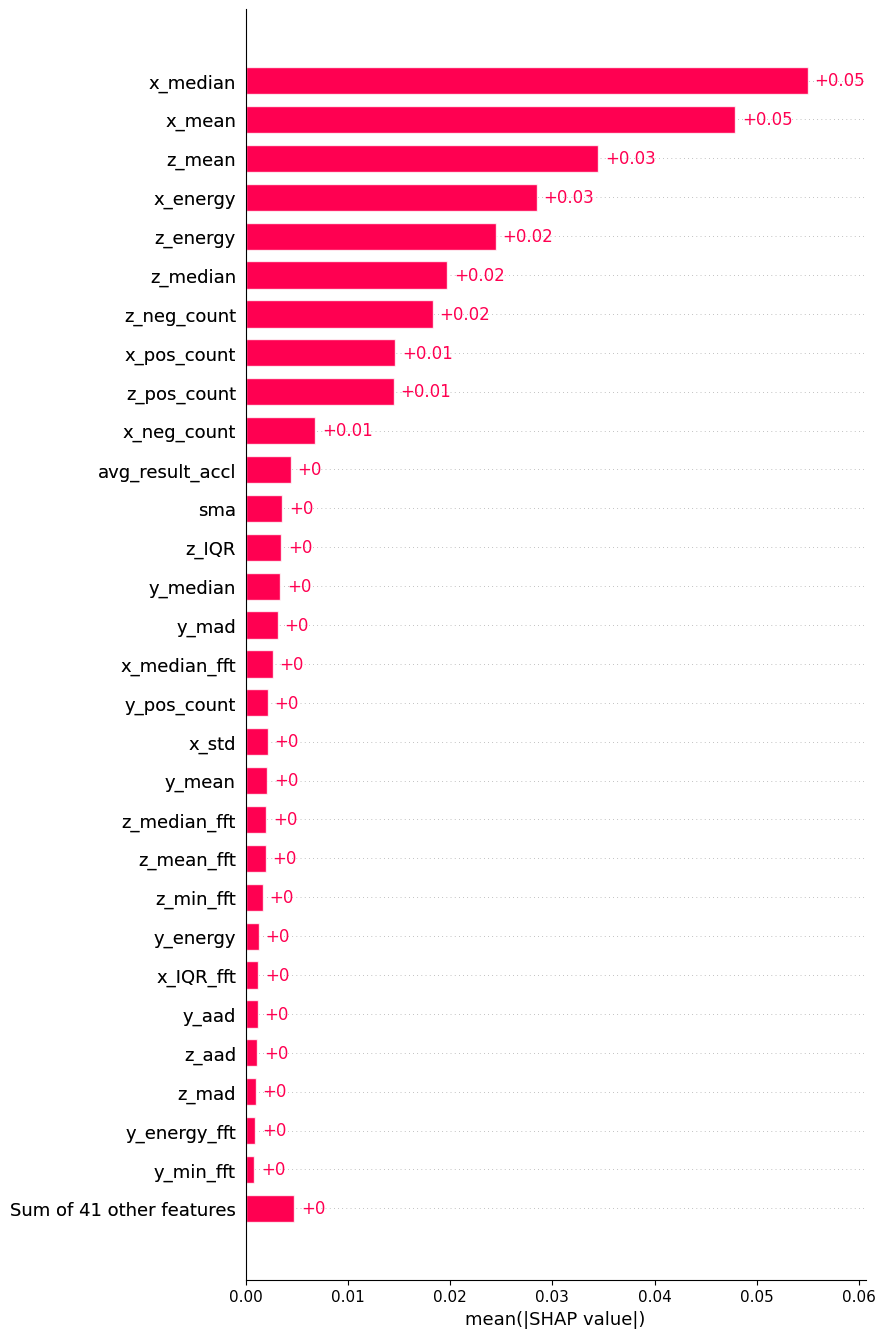

In [48]:
import numpy as np
import shap

# Lấy trị tuyệt đối rồi trung bình theo toàn bộ lớp
shap_values_mean = np.mean(np.abs(shap_values.values), axis=2)

# Tạo lại một đối tượng Explanation 2D để vẽ
shap_values_combined = shap.Explanation(
    values=shap_values_mean,
    base_values=shap_values.base_values.mean(axis=1),
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

# Vẽ biểu đồ “global importance”
shap.plots.bar(shap_values_combined, max_display=30)

🧠 Training Neural Network (optimized)...
🧩 Classes: 4
Epoch 1/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.9523 - loss: 0.1454
Epoch 2/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.9981 - loss: 0.0047
Epoch 3/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.9989 - loss: 0.0053
Epoch 4/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.9992 - loss: 0.0022
Epoch 5/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.9995 - loss: 0.0017
Epoch 6/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.9996 - loss: 0.0020
Epoch 7/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.9992 - loss: 0.0029
Epoch 8/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.9994 - loss: 0.0014
Epoch 9/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.9989 - loss: 0.0034
Epoch 10/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.9994 - loss: 0.0016
Epoch 11/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy

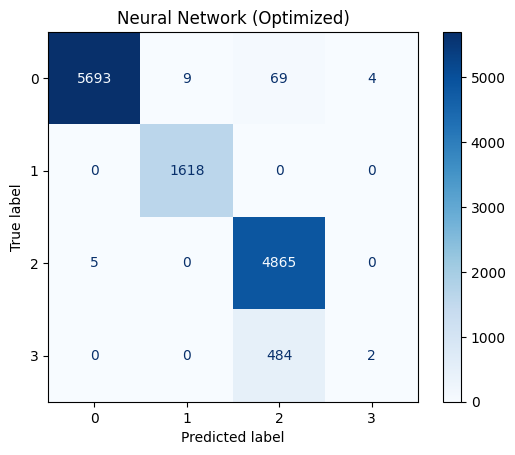

In [22]:
from models import train_NN_raw
modelSVM = train_NN_raw(total_list_NN, total_list_NN_test,
                    train_labels_NN, train_labels_NN_test)